Notebook Author: Florent Michel

In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

import geomstats.backend as gs
from geomstats.geometry.discrete_curves import DiscreteCurves, R2
from geomstats.datasets.utils import load_cells

INFO: Using numpy backend


In [3]:
cells, _, _ = load_cells()

In [4]:
def interpolate(curve, nb_points):
    """Interpolate a discrete curve with nb_points from a discrete curve.

    Returns
    -------
    interpolation : discrete curve with nb_points points
    """
    old_length = curve.shape[0]
    interpolation = gs.zeros((nb_points, 2))
    incr = old_length/nb_points
    pos = 0
    for i in range(nb_points):
        index = int(gs.floor(pos))
        interpolation[i] = curve[index] + (pos - index)*(curve[(index + 1)%old_length] - curve[index])
        pos += incr
    return interpolation

cells = [interpolate(cell, 100) for cell in cells]
cells = gs.array(cells)

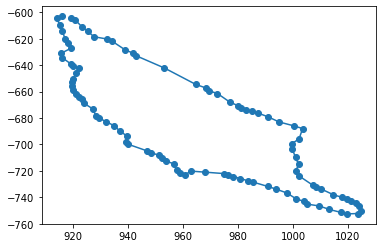

In [5]:
cell = cells[0]

plt.plot(cell[:, 0], cell[:, 1], '-o')
plt.show()

In [6]:
def plot_geodesic(initial_curve, end_curve, a=1, b=1):
    """Plot a geodesic between two curves for the elastic
    metric with parameters (a, b).

    Parameters
    ----------
    initial_curve : array-like, shape=[n_sampling_points, 2]
        Discrete curve.
    end_curve : array-like, shape=[n_sampling_points, 2]
        Discrete curve.
    a : float
        Bending parameter.
    b : float
        Stretching parameter.
    """
    discrete_curves = DiscreteCurves(R2, a, b)
    metric = discrete_curves.elastic_metric

    times = gs.linspace(0, 1, 10)
    path = metric.geodesic(initial_curve, end_curve)
    geodesic = path(times)

    fig = plt.figure(figsize = (20, 10))
    plt.title(f"Geodesic between two cells (a = {a}, b = {b})")
    plt.axis('off')

    for i in range(len(geodesic)):
        fig.add_subplot(2, len(geodesic) // 2, i + 1)
        curve = geodesic[i]
        plt.plot(curve[:, 0], curve[:, 1], '-o')
        plt.axis('equal')
        plt.axis('off')

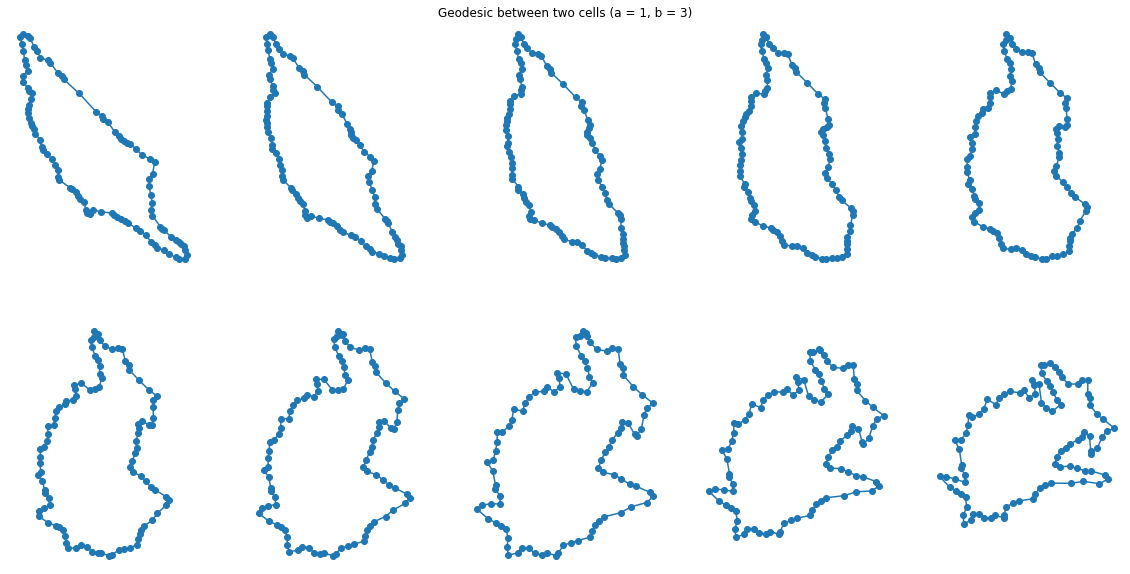

In [7]:
cell_1 = cells[0]
cell_2 = cells[120]
plot_geodesic(cell_1, cell_2, a=1, b=3)


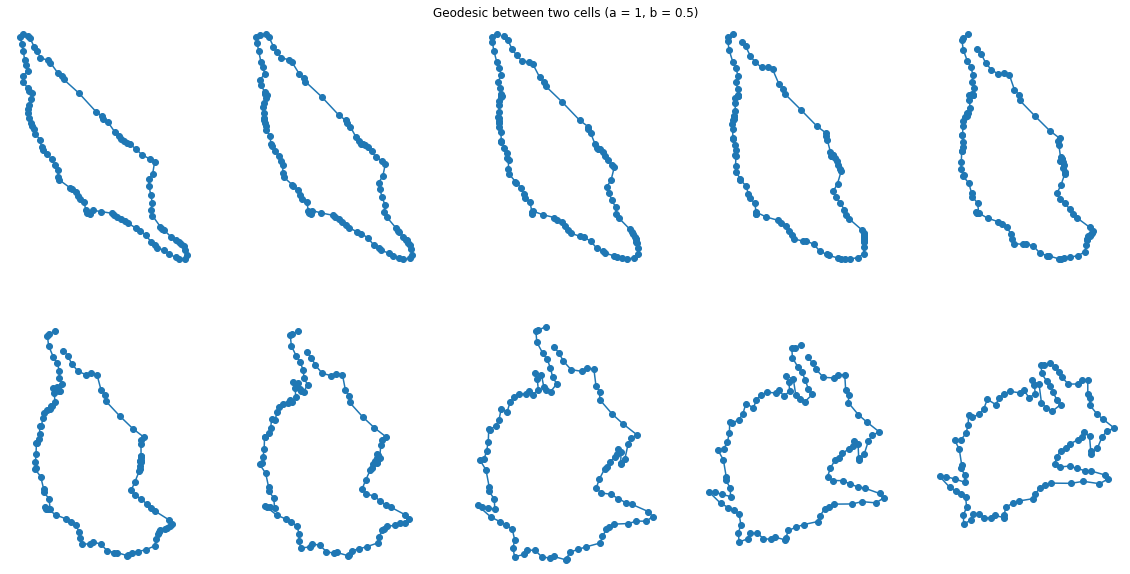

In [8]:
plot_geodesic(cell_1, cell_2, a=1, b=0.5)